In [58]:
# ライブラリをインポート

# データ操作と数値計算のため
import pandas as pd
import numpy as np

# データ可視化のため
import matplotlib.pyplot as plt
import seaborn as sns

# 統計モデリングと計量経済分析のため
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

In [59]:
# データの読み込み
url = "https://www.fbc.keio.ac.jp/~tyabu/keiryo/rent_data.csv"
df = pd.read_csv(url)
df.head()

,rent,space,distance,age,floor
0,14.6,50.51,8,7,1
1,14.8,50.51,8,7,2
2,11.0,50.08,20,19,3
3,7.0,25.04,20,19,2
4,11.3,50.08,20,19,3


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      724 non-null    float64
 1   space     724 non-null    float64
 2   distance  724 non-null    int64  
 3   age       724 non-null    int64  
 4   floor     724 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 28.4 KB


In [61]:
df.describe()

,rent,space,distance,age,floor
count,724.000000,724.000000,724.000000,724.000000,724.000000
mean,7.035912,27.130124,10.796961,26.821823,1.983425
std,2.244058,12.179073,4.769827,11.025685,0.992225
min,3.600000,5.400000,1.000000,0.000000,1.000000
25%,5.500000,18.310000,7.000000,20.000000,1.000000
50%,6.500000,22.120000,10.000000,29.000000,2.000000
75%,8.000000,35.000000,15.000000,34.000000,2.000000
max,18.000000,80.550000,23.000000,59.000000,7.000000


# 3.5節の推定結果
724物件のデータを用いた推定

In [62]:
endog = df['rent']
exog = df['space']
exog = sm.add_constant(exog)

mod_1 = sm.OLS(
  endog,
  exog
)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     2244.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          1.03e-223
Time:                        18:28:19   Log-Likelihood:                -1100.5
No. Observations:                 724   AIC:                             2205.
Df Residuals:                     722   BIC:                             2214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6878      0.101     26.718      0.0

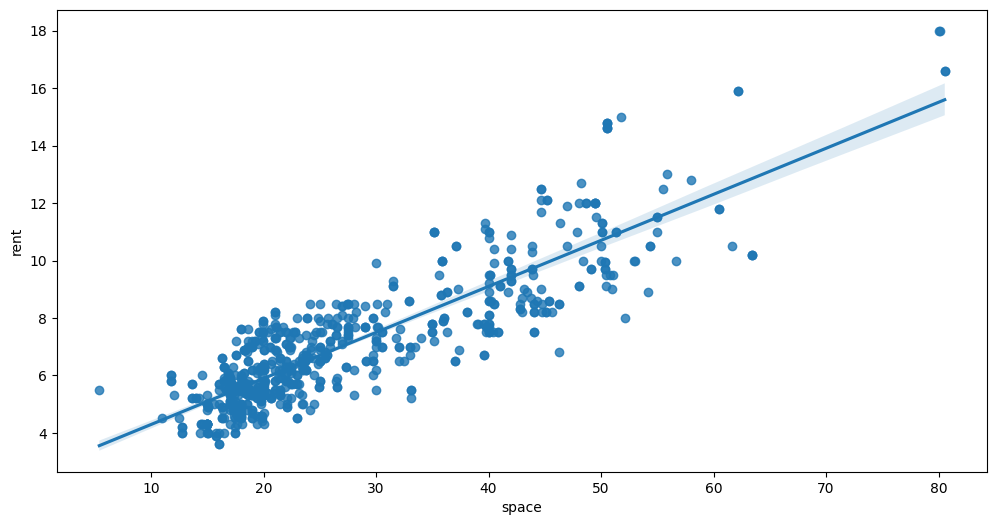

In [63]:
plt.figure(figsize=(12, 6))
sns.regplot(
  x = df['space'],
  y = df['rent']
)
plt.show()

# 5.3.2節の推定結果

In [64]:
endog = df['rent']
exog = df[['distance', 'space']]
exog = sm.add_constant(exog)

mod_2 = sm.OLS(
  endog,
  exog
)
res_2 = mod_2.fit()
# print(res_2.summary())

In [65]:
endog = df['rent']
exog = df['distance']
exog = sm.add_constant(exog)

mod_3 = sm.OLS(
  endog,
  exog
)
res_3 = mod_3.fit()
# print(res_3.summary())

In [66]:
results_table = summary_col(
    results = [
        res_2,
        res_3
    ],
    model_names = [
        'Eq(2)',
        'q(3)'
    ],
    stars = True,
    float_format = '%0.2f',
    info_dict = {
        'N':lambda x: "{0:d}".format(int(x.nobs))
    }
)

print(results_table)


                Eq(2)     q(3) 
-------------------------------
const          3.15***  6.03***
               (0.11)   (0.20) 
distance       -0.07*** 0.09***
               (0.01)   (0.02) 
space          0.17***         
               (0.00)          
R-squared      0.77     0.04   
R-squared Adj. 0.77     0.04   
N              724      724    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [67]:
correlation_matrix = np.corrcoef(
    df['distance'],
    df['space']
)
correlation_coefficient = np.round(correlation_matrix[0, 1], 2)
print(correlation_coefficient)


0.37


# 5.6.2節の推定結果

In [68]:
endog = df['rent']
exog = df['space']
exog = sm.add_constant(exog)

mod_4 = sm.OLS(
    endog,
    exog
)
res_4 = mod_4.fit()
# print(res_4.summary())

In [69]:
endog = df['rent']
exog = df[['space', 'distance']]
exog = sm.add_constant(exog)

mod_5 = sm.OLS(
    endog,
    exog
)
res_5 = mod_5.fit()
# print(res_5.summary())

In [70]:
endog = df['rent']
exog = df[['space', 'distance', 'age', 'floor']]
exog = sm.add_constant(exog)

mod_6 = sm.OLS(
    endog,
    exog
)
res_6 = mod_6.fit()
# print(res_6.summary())

In [71]:
results_table = summary_col(
    results = [
        res_4,
        res_5,
        res_6
    ],
    model_names = [
        'Eq(4)',
        'Eq(5)',
        'Eq(6)'
    ],
    stars = True,
    float_format = '%0.2f',
    info_dict = {
        'N':lambda x: "{0:d}".format(int(x.nobs))
    }
)

print(results_table)


                Eq(4)   Eq(5)    Eq(6)  
----------------------------------------
const          2.69*** 3.15***  4.74*** 
               (0.10)  (0.11)   (0.12)  
space          0.16*** 0.17***  0.17*** 
               (0.00)  (0.00)   (0.00)  
distance               -0.07*** -0.08***
                       (0.01)   (0.01)  
age                             -0.07***
                                (0.00)  
floor                           0.22*** 
                                (0.03)  
R-squared      0.76    0.77     0.88    
R-squared Adj. 0.76    0.77     0.88    
N              724     724      724     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# 6.6節の推定結果
測定単位を変更する

In [72]:
df['rent_10000'] = df['rent'] * 10000 # rentの単位を変更

In [73]:
endog = df['rent']
exog = df['space']
exog = sm.add_constant(exog)

mod_7 = sm.OLS(
    endog,
    exog
)
res_7 = mod_7.fit()
# print(res_7.summary())

In [74]:
endog = df['rent_10000']
exog = df['space']
exog = sm.add_constant(exog)

mod_8 = sm.OLS(
    endog,
    exog
)
res_8 = mod_8.fit()
# print(res_8.summary())

In [75]:
results_table = summary_col(
    results = [
        res_7,
        res_8
    ],
    model_names = [
        'Eq(7)',
        'Eq(8)'
    ],
    stars = True,
    float_format = '%0.2f',
    info_dict = {
        'N':lambda x: "{0:d}".format(int(x.nobs))
    }
)

print(results_table)


                Eq(7)     Eq(8)   
----------------------------------
const          2.69*** 26878.34***
               (0.10)  (1006.01)  
space          0.16*** 1602.68*** 
               (0.00)  (33.83)    
R-squared      0.76    0.76       
R-squared Adj. 0.76    0.76       
N              724     724        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# 9.3節の推定結果

In [76]:
endog = df['rent']
exog = df['space']
exog = sm.add_constant(exog)

mod_9 = sm.OLS(
    endog,
    exog
)
res_9 = mod_9.fit()
# print(res_9.summary())

In [77]:
endog = df['rent']
exog = df['space']
exog = sm.add_constant(exog)

mod_10 = sm.OLS(
    endog,
    exog
)
res_10 = mod_10.fit()
# print(res_10.summary())

In [78]:
results_table = summary_col(
    results = [
        res_9,
        res_10
    ],
    model_names = [
        'Eq(9)',
        'Eq(10)'
    ],
    stars = True,
    float_format = '%0.2f',
    info_dict = {
        'N':lambda x: "{0:d}".format(int(x.nobs))
    }
)

print(results_table)


                Eq(9)   Eq(10)
------------------------------
const          2.69*** 2.69***
               (0.10)  (0.10) 
space          0.16*** 0.16***
               (0.00)  (0.00) 
R-squared      0.76    0.76   
R-squared Adj. 0.76    0.76   
N              724     724    
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01
